## **Question No. 1**
From sklearn.datasets load digits dataset and do following:


*   Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv
*   Plot confusion matrix
*   Plot classification report







In [101]:
#importing the necessary packages
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [102]:
mnist= datasets.load_digits()

In [103]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
mnist.target, test_size=0.15, random_state=42)
#85% of data is used for training and 15% for testing purpose
# Now let's take 10% of data and use it for Validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)


In [104]:
# show the sizes of each data split

print("training data points: {}".format(len(trainLabels)))
print("testing data points: {}".format(len(testLabels)))
print("validation data points: {}".format(len(valLabels)))

training data points: 1374
testing data points: 270
validation data points: 153


In [105]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k

kList = range(1, 50, 2)
accuracies = []

# loop over various values of k for the k-Nearest Neighbor classifier

for k in range(1, 50, 2):
          # train the k-Nearest Neighbor classifier with the current value of k
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(trainData, trainLabels)
          # evaluate the model and update the accuracies list
          score = model.score(valData, valLabels)
          print("For k=%d, accuracy = %.2f%%" % (k, score * 100))
          accuracies.append(score)

For k=1, accuracy = 98.04%
For k=3, accuracy = 98.69%
For k=5, accuracy = 98.69%
For k=7, accuracy = 96.73%
For k=9, accuracy = 98.04%
For k=11, accuracy = 97.39%
For k=13, accuracy = 97.39%
For k=15, accuracy = 97.39%
For k=17, accuracy = 96.73%
For k=19, accuracy = 96.08%
For k=21, accuracy = 96.73%
For k=23, accuracy = 96.08%
For k=25, accuracy = 96.08%
For k=27, accuracy = 95.42%
For k=29, accuracy = 94.77%
For k=31, accuracy = 94.77%
For k=33, accuracy = 94.77%
For k=35, accuracy = 94.77%
For k=37, accuracy = 94.77%
For k=39, accuracy = 94.12%
For k=41, accuracy = 94.12%
For k=43, accuracy = 92.81%
For k=45, accuracy = 92.16%
For k=47, accuracy = 92.16%
For k=49, accuracy = 92.16%


In [106]:
# find the value of k that has the largest accuracy

i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kList[i],accuracies[i] * 100))

k=3 achieved highest accuracy of 98.69% on validation data


In [107]:
# re-train our classifier using the best k value and predict the labels of the
# test data

model = KNeighborsClassifier(n_neighbors=kList[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)
print(predictions[1])

9


In [108]:
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits

print("EVALUATION ON TESTING DATA\n")
print(classification_report(testLabels, predictions))

print ("------- Confusion matrix -------")
print(confusion_matrix(testLabels,predictions))

EVALUATION ON TESTING DATA

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        24
           4       0.97      1.00      0.99        37
           5       0.97      1.00      0.99        33
           6       1.00      1.00      1.00        30
           7       1.00      0.96      0.98        26
           8       0.95      0.95      0.95        19
           9       0.97      0.91      0.94        34

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270

------- Confusion matrix -------
[[23  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  

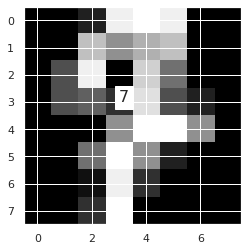

The digit may be : 7




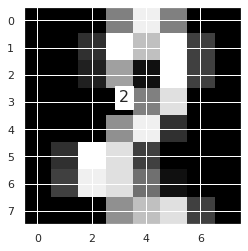

The digit may be : 2




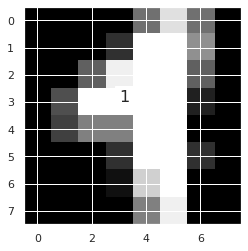

The digit may be : 1




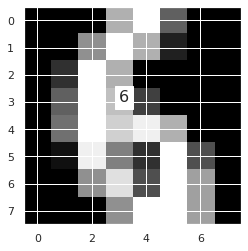

The digit may be : 6




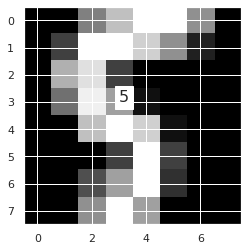

The digit may be : 5




In [109]:
# loop over a few random digits

for i in np.random.randint(0, high=len(testLabels), size=(5,)):
         # grab the image and classify it
         image = testData[i]
         prediction = model.predict([image])[0]
         
         # show the prediction
         
         imgdata = np.array(image, dtype='float')
         pixels = imgdata.reshape((8,8))
         plt.imshow(pixels,cmap='gray')
         plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
         plt.show()
         cv2.waitKey(0)
         print("The digit may be : {}\n\n".format(prediction))

In [110]:
# final classification report demonstrating the accuracy of the classifier
# for each of the digits

print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        24
           4       0.97      1.00      0.99        37
           5       0.97      1.00      0.99        33
           6       1.00      1.00      1.00        30
           7       1.00      0.96      0.98        26
           8       0.95      0.95      0.95        19
           9       0.97      0.91      0.94        34

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270

